# Patterns that determine the success of game platforms

## Project Description

The online store sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms are available from open sources. The parameters that determine the game's success in different regions of the world are revealed. Potentially popular products identified and advertising campaigns planned. The current period for analysis has been selected. Portraits of users of each region were compiled. Hypotheses tested: The average user ratings for Xbox One and PC platforms are the same; the average user ratings for the Action and Sports genres differ. The analysis used Student's t-test for independent samples.


## Import libraries and read CSV files

### Tasks:

- [x]  Import libraries;
- [x]  Read CSV;
- [x]  Make strings lower; 
- [x]  Recast the Data to type;
- [x]  Process 'tbd'
- [x]  Create a column contains total sales in different regions

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Read CSV

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Data Description

In [3]:
data.info() #изучаем информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


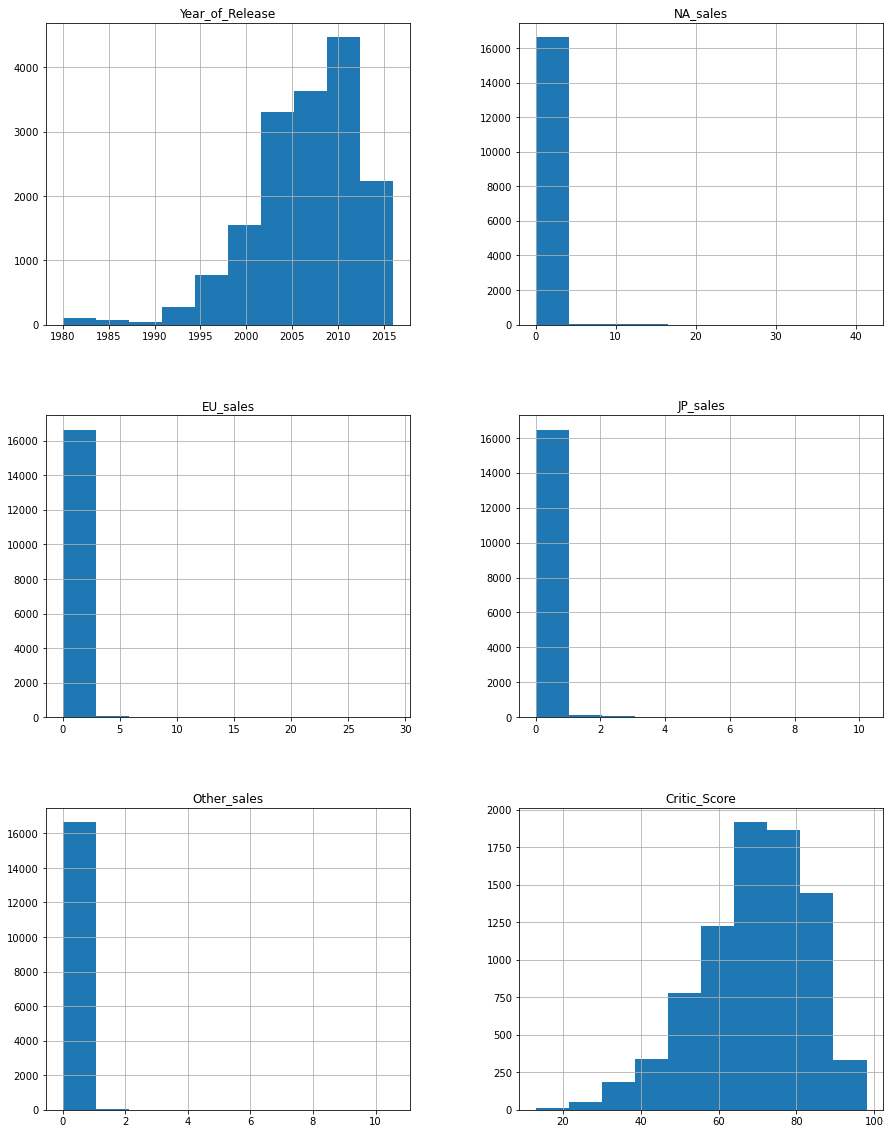

In [5]:
data.hist(figsize=(15, 20)); 

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') #выводим кол-во пропущенных значений в %

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


### Removal the missing values and lower-case

In [7]:
data.columns = data.columns.str.lower() 

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Gap filling: we obtain that "Critic_Score", "User_Score", and "Rating" are full of missing values. It would be more appropriate to fill them in a data-driven way. We suggest that the missing values emerged as a human factor cause-effect. To fill these gaps, we recognize it is rational to remove them gaps: it is impossible to replace them with a zero value. Otherwise, the data will be distorted during analysis. Alternatively, one could use imputation methods such as mean, median, or mode to fill in the gaps, but it is essential to be aware of these methods' potential biases and limitations.

In [9]:
data.dropna(subset=['name'], inplace=True) 

data[data['name'].isnull()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
data.dropna(subset=['year_of_release'], inplace=True) 
data[data['year_of_release'].isnull()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Chek the data by sales 

In [11]:
print('The amount of games in North America - {} ({:.2%})'.format(len(data.query('na_sales == 0')), len(data.query('na_sales == 0')) / len(data)))
print('The amount of games in Europe - {} ({:.2%})'.format(len(data.query('eu_sales == 0')), len(data.query('eu_sales == 0')) / len(data)))
print('The amount of games in Japan - {} ({:.2%})'.format(len(data.query('jp_sales == 0')), len(data.query('jp_sales == 0')) / len(data)))
print('The amount of games in other regions - {} ({:.2%})'.format(len(data.query('other_sales == 0')), len(data.query('other_sales == 0')) / len(data)))

The amount of games in North America - 4449 (27.06%)
The amount of games in Europe - 5766 (35.06%)
The amount of games in Japan - 10300 (62.64%)
The amount of games in other regions - 6492 (39.48%)


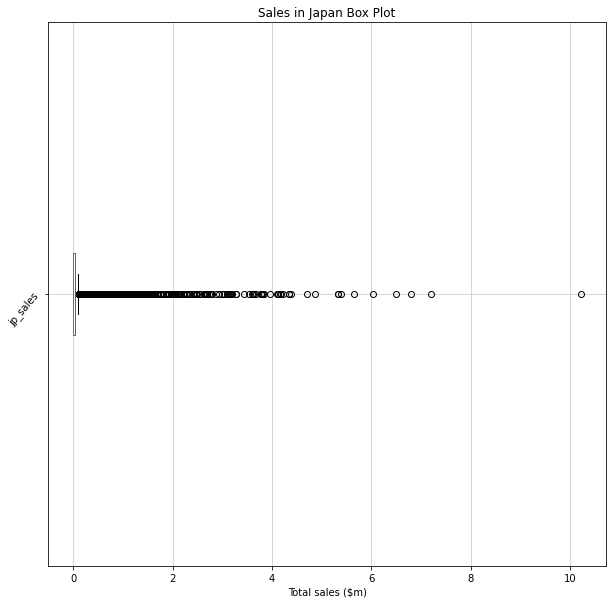

In [12]:
data.boxplot(column='jp_sales', vert=False, figsize=(10, 10), rot=50)
plt.xlabel('Total sales ($m)')
plt.grid(linewidth=0.5)
plt.title('Sales in Japan Box Plot')
plt.show()

In [13]:
data.query("jp_sales >= 4").head(10) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN


In [14]:
data.query("jp_sales <= 1").head(10) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M


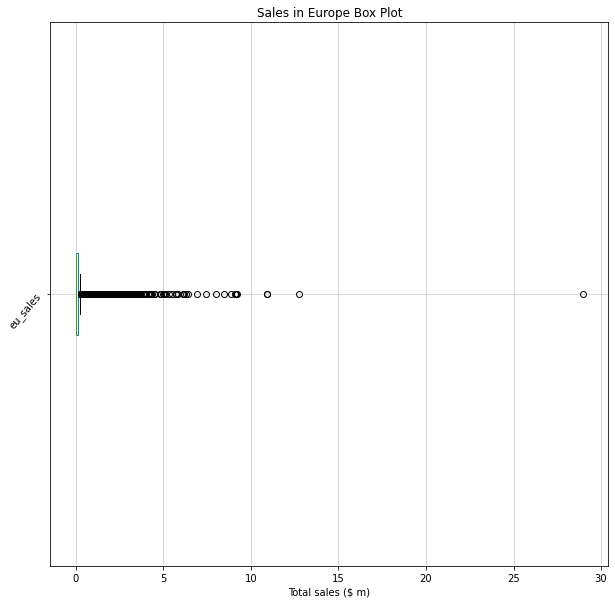

In [15]:
data.boxplot(column='eu_sales', vert=False, figsize=(10, 10), rot=50) #проверим остальные распределения
plt.xlabel('Total sales ($ m)')
plt.grid(linewidth=0.5)
plt.title('Sales in Europe Box Plot')
plt.show()

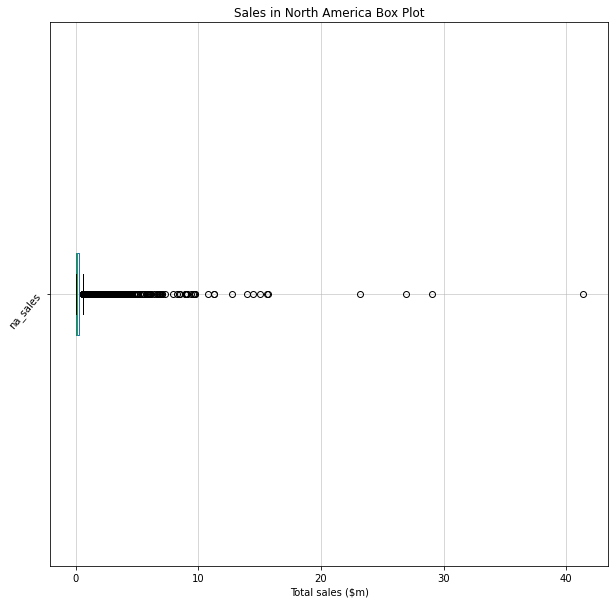

In [16]:
data.boxplot(column='na_sales', vert=False, figsize=(10, 10), rot=50) #проверим остальные распределения
plt.xlabel('Total sales ($m)')
plt.grid(linewidth=0.5)
plt.title('Sales in North America Box Plot')
plt.show()

In [17]:
print(data.duplicated().sum()) 

0


In [18]:
data['year_of_release'] = data['year_of_release'].replace('tbd', np.NaN) #fill tbd NaN
data = data.astype({'year_of_release': 'Int64'}) #data type recast
data['user_score'] = data['user_score'].replace('tbd', np.NaN) #fill tbd NaN
data = data.astype({'user_score': 'float64'}) #data type recast
data['critic_score'] = data['critic_score'].replace('tbd', np.NaN) #fill tbd NaN
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Pearson correlation coefficient = 0.5796706281932218


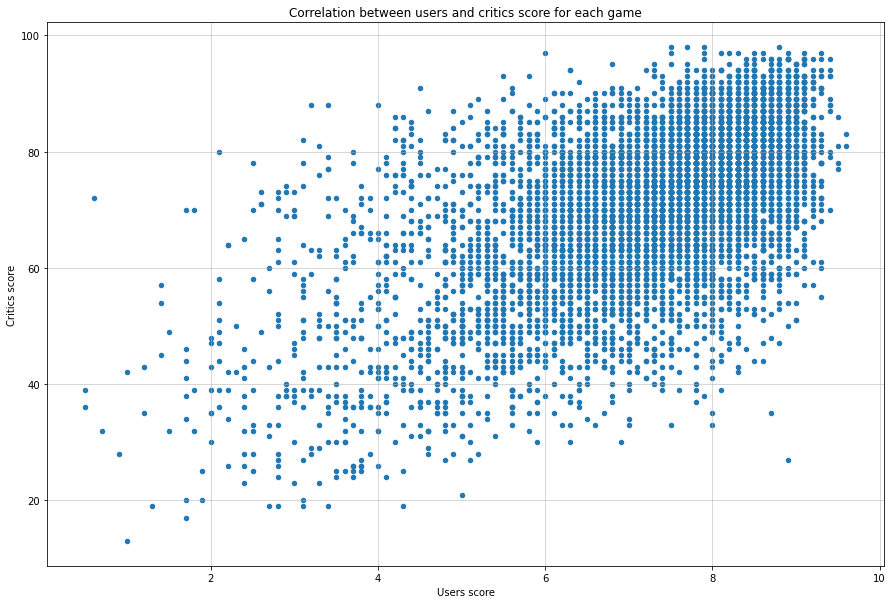

In [19]:
print('Pearson correlation coefficient =', data['user_score'].corr(data['critic_score']))
data.plot(kind='scatter', x='user_score', y='critic_score', figsize=(15, 10))
plt.xlabel('Users score')
plt.ylabel('Critics score')
plt.grid(linewidth=0.5)
plt.title('Correlation between users and critics score for each game')
plt.show()

### Create a column contains total sales in different regions

In [20]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Conclusions:

The preprocessing stage began by converting the column names to lowercase to ensure consistency.

The next step involved identifying the columns that contained the most missing values, found to be in the critic and user rating blocks. Filling in the missing values with the median was deemed inappropriate due to the variability of scores for each game. Since the number of missing values was relatively small and would not significantly impact the data, we have decided to remove them.

The presence of missing values in the rating data was determined to be a result of the human factor, as not all users or critics have rated each game.

The following step involved analyzing sales data across different regions, and the data was observed to have a normal distribution without anomalies. North America region has the highest sales.
During initial data processing, the user and critic ratings were positively correlated, with a Pearson correlation index of approximately 0.58.

For further analysis, the total sales across all regions for each game were calculated.
Furthermore, during preprocessing, the ESRB rating was only present in games released or sold in North America. The missing ESRB ratings are a factor that is dependent on regional characteristics.

## Research of the Data

### Tasks

- [x] Obtain how many games were published per year.
- [x]  Study the change in sales by platform. Select platforms with max sales and plot the distribution by years.
- [x] Select the current period for forecasting for 2017
- [x] Identify platform top sellers
- [x] Box Plot of global game sales by platform. Describe the result.
- [x] Establish a correlation between sales within one popular platform and feedback from users and critics. Create a scatterplot. Formulate conclusions.
- [x] Establish cause-and-effect relationships between sales of games and platforms. Look at the overall distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

### Games Publishing for decades

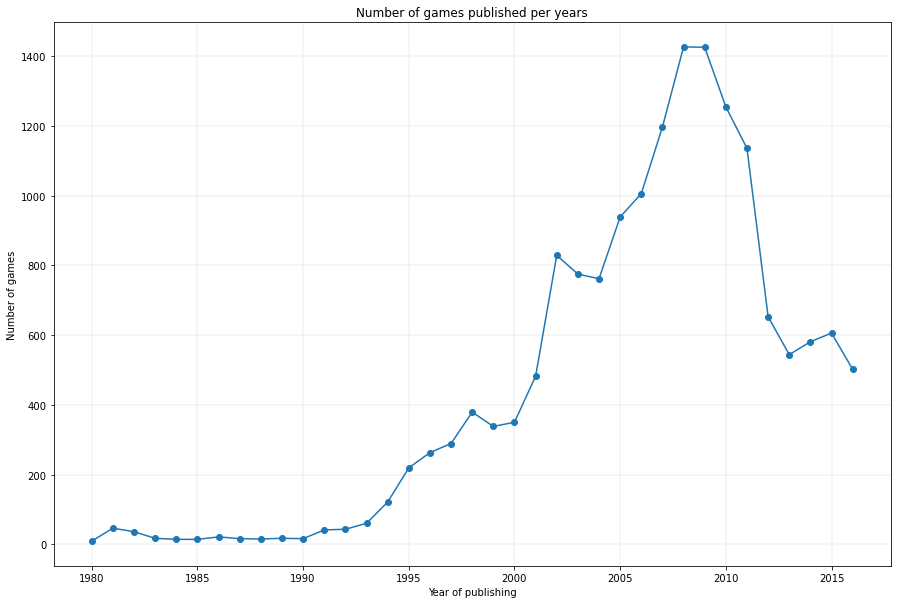

In [21]:
data.groupby('year_of_release')['name'].count().plot(style='o-', figsize=(15, 10))
plt.xlabel('Year of publishing')
plt.ylabel('Number of games')
plt.grid(linewidth=0.2)
plt.title('Number of games published per years')
plt.show()

Likewise, games publishing has rocketed to the top aproximately from 2008 to 2009

### Best sellers and top platforms

In [22]:
platform_name = data.groupby('platform')['name'].count().sort_values(ascending = False)
platform_name

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: name, dtype: int64

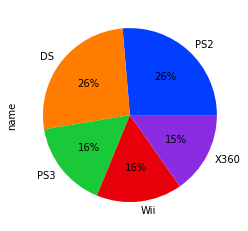

In [23]:
colors = sns.color_palette('bright')[0:5]
platform_name.head().plot(y='platform', kind='pie', colors = colors, autopct='%.0f%%');
plt.show() 

PS2 has published bestsellers 

In [24]:
sales_by_platform = data.groupby('platform')['total_sales'].sum()

top_seller = list(sales_by_platform[sales_by_platform > 600].index)

top_seller #список лучших платформ по продажам

['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

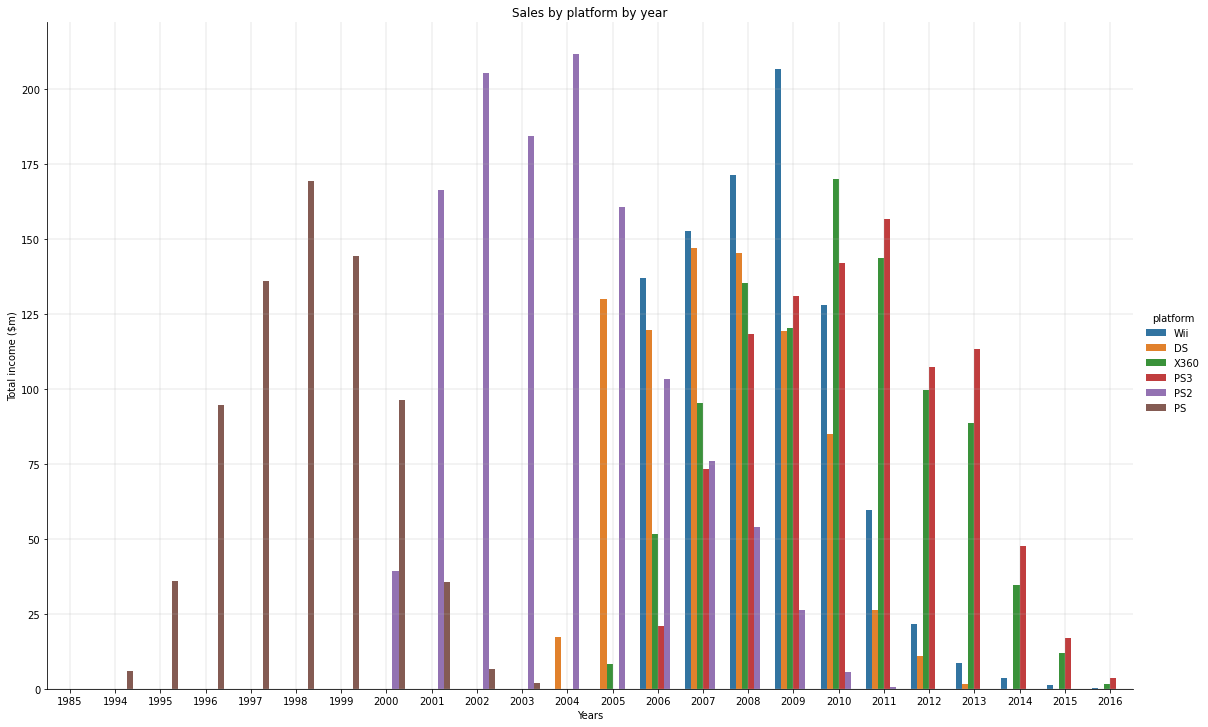

In [25]:
sns.catplot(
    kind='bar',
    data=data.query('platform in @top_seller'),
    x='year_of_release',
    y='total_sales',
    hue='platform',
    height=10,
    aspect=1.6,
    ci=None,
    estimator=sum);
plt.xlabel('Years')
plt.ylabel('Total income ($m)')
plt.grid(linewidth=.3)
plt.title('Sales by platform by year')
plt.show()

In [26]:
import warnings
warnings.filterwarnings("ignore")

It is clear that the more outdated platforms made money during their period of popularity, and after that they declined. Until 2000, PS was a monopolist and occupied the market. After the PS2 era began. Only in 2006 we see the appearance of competitors - Wii, dS, X360.

## Current period for analysis  – 2012-2016

The data appears realistic, showing that between 2000 and 2010, new platforms for video games began to emerge, and the game production industry developed rapidly. However, the life cycle of these platforms tends to be relatively short, as gaming giants such as PlayStation, Xbox, and Nintendo regularly produce new models and games. As a result, some platforms become obsolete over time while others replace them.
For instance, the popularity of platforms such as WiiU and GC waned among players from 2012-2015, making them less relevant.

In [27]:
actual_data = data.loc[data['year_of_release'] >= 2012]

actual_data['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

### Global Sales Box Plot by platforms 

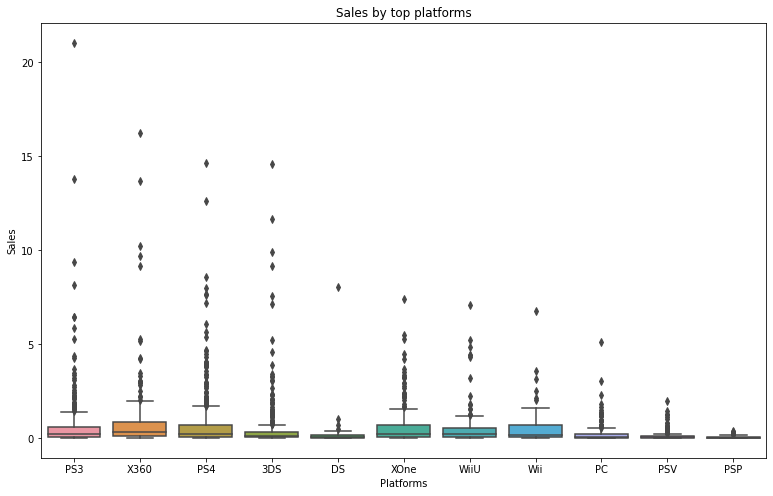

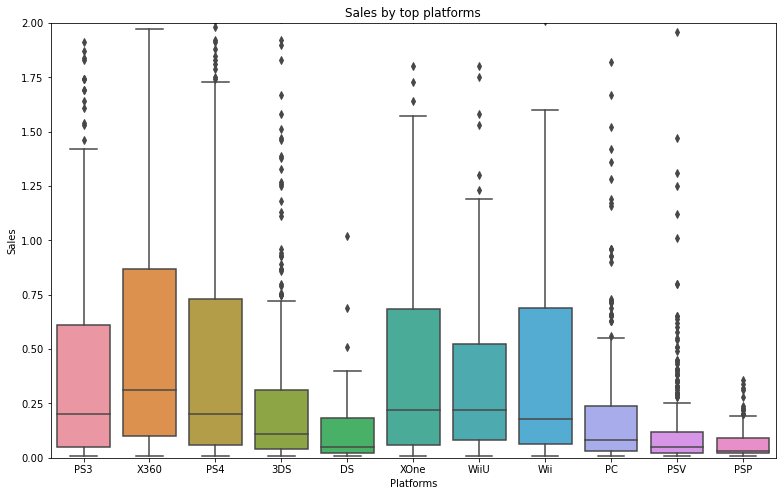

In [28]:

import seaborn as sns
actual_data, y = actual_data, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_data, y = y, x='platform')
    .set(title = 'Sales by top platforms', xlabel = 'Platforms', ylabel = 'Sales'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_data, y = y, x='platform')
    .set(title = 'Sales by top platforms', xlabel = 'Platforms', ylabel = 'Sales', ylim=(0, 2)))
plt.show()

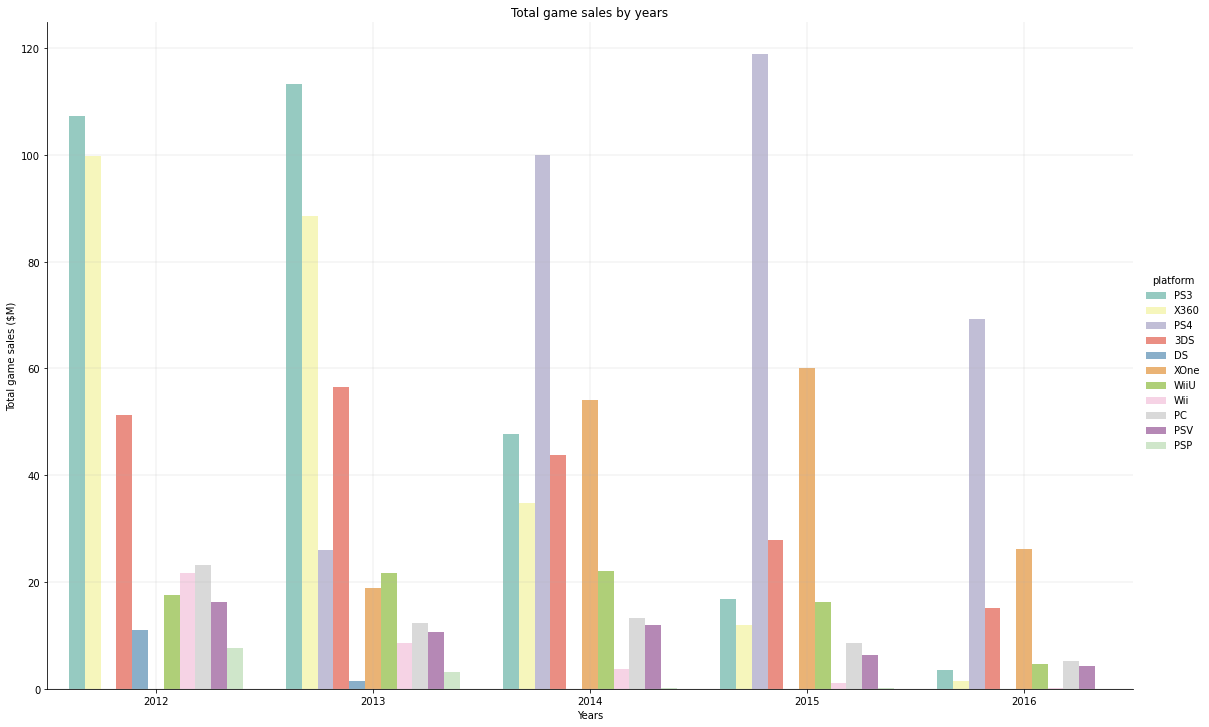

In [73]:
sns.catplot(
    kind='bar',
    data=actual_data,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    height=10,
    aspect=1.6,
    ci=None,
    estimator=sum,
    palette='Set3');
plt.xlabel('Years')
plt.ylabel('Total game sales ($M)')
plt.grid(linewidth=0.2)
plt.title('Total game sales by years')
plt.show()

### Conclusions

Based on the graphs, sales distribution across platforms could be better. The whisker plot indicates that the upper limit of sales for X360 is higher than that of the other platforms, and the medians are also notably different. It would be prudent to calculate the sum of total sales and their median.

For instance, the bar chart reveals that PS4 had the highest sales, but the distribution graph shows that its median value is lower than that of other platforms. We suggest that in 2015, PS4 had a particularly successful game release that contributed up to 80% of its annual revenue.

In [30]:
actual_data.query('platform in @top_seller').describe() 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,870.000000,870.000000,870.000000,870.000000,870.000000,391.000000,538.000000,870.000000
mean,2013.286207,0.305138,0.226241,0.050540,0.076989,71.342711,6.384944,0.658908
std,1.237008,0.763732,0.610221,0.151764,0.219823,13.636685,1.634423,1.536390
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,64.000000,5.400000,0.060000
50%,2013.000000,0.075000,0.050000,0.000000,0.020000,74.000000,6.800000,0.220000
75%,2014.000000,0.327500,0.210000,0.040000,0.080000,81.000000,7.675000,0.680000
max,2016.000000,9.660000,9.090000,3.140000,3.960000,97.000000,9.100000,21.050000


In [31]:
actual_data.query('platform == "PS3"')['total_sales'].describe() 

count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64

In [32]:
actual_data.query('platform == "X360"')['total_sales'].describe()

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64

In [33]:
actual_data.query('platform == "PS4"')['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [34]:
actual_data.query('platform == "3DS"')['total_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

In [35]:
actual_data.query('platform == "DS"')['total_sales'].describe()

count    31.000000
mean      0.404839
std       1.439245
min       0.010000
25%       0.020000
50%       0.050000
75%       0.185000
max       8.060000
Name: total_sales, dtype: float64

### Critics' influence on sales 

In [36]:
a = actual_data['total_sales'].corr(actual_data['user_score'])
b = actual_data['total_sales'].corr(actual_data['critic_score'])
print('Pearson correlation coefficient (users score and sales) =', a)
print('Pearson correlation coefficient (critics score and sales) =', b)

Pearson correlation coefficient (users score and sales) = 0.0044288176754932575
Pearson correlation coefficient (critics score and sales) = 0.30819674592077767


In [37]:
actual_data.query('user_score < 2').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2945,FIFA Soccer 13,Wii,2012,Action,0.18,0.44,0.00,0.07,NaN,1.6,E,0.69
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E,0.41
5010,FIFA 17,X360,2016,Sports,0.07,0.28,0.00,0.03,NaN,1.7,E,0.38
5166,NHL 15,PS3,2014,Sports,0.21,0.09,0.00,0.06,NaN,1.6,E10+,0.36
7479,Tony Hawk's Pro Skater 5,PS4,2015,Sports,0.09,0.08,0.00,0.03,32.0,1.5,T,0.20
8265,Madden NFL 17,X360,2016,Sports,0.14,0.02,0.00,0.02,NaN,0.7,E,0.18
9970,Madden NFL 17,PS3,2016,Sports,0.07,0.02,0.00,0.02,NaN,0.2,E,0.11
12756,Rugby World Cup 2015,PS4,2015,Sports,0.00,0.05,0.00,0.01,25.0,1.9,E,0.06
12822,Ride to Hell,X360,2013,Racing,0.04,0.01,0.00,0.01,19.0,1.3,M,0.06
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.00,0.01,13.0,1.0,M,0.04


In [38]:
actual_data.query('critic_score < 30').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7790,Fighter Within,XOne,2013,Fighting,0.11,0.07,0.0,0.02,23.0,3.0,T,0.20
9519,Game Party: Champions,WiiU,2012,Action,0.09,0.03,0.0,0.01,24.0,3.5,E,0.13
10015,Rugby 15,PS4,2015,Sports,0.04,0.06,0.0,0.02,19.0,3.4,E,0.12
11222,Rugby 15,XOne,2015,Sports,0.03,0.05,0.0,0.01,20.0,3.1,E,0.09
12756,Rugby World Cup 2015,PS4,2015,Sports,0.00,0.05,0.0,0.01,25.0,1.9,E,0.06
12822,Ride to Hell,X360,2013,Racing,0.04,0.01,0.0,0.01,19.0,1.3,M,0.06
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04
15521,Tenkai Knights: Brave Battle,3DS,2014,Action,0.01,0.01,0.0,0.00,26.0,2.4,E10+,0.02


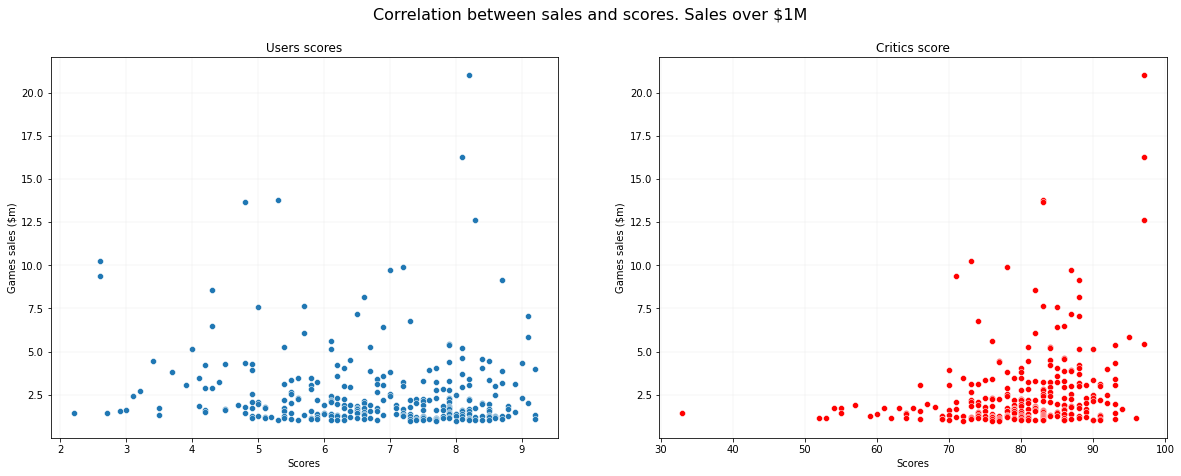

In [39]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('total_sales > 1'), ax=ax1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('total_sales > 1'), ax=ax2, color='red')

fig.suptitle('Correlation between sales and scores. Sales over $1M', fontsize=16)

ax1.set_xlabel('Scores')
ax1.set_ylabel('Games sales ($m)')
ax1.grid(linewidth=0.1)
ax1.set_title('Users scores')

ax2.set_xlabel('Scores')
ax2.set_ylabel('Games sales ($m)')
ax2.grid(linewidth=0.1)
ax2.set_title('Critics score')
plt.show()

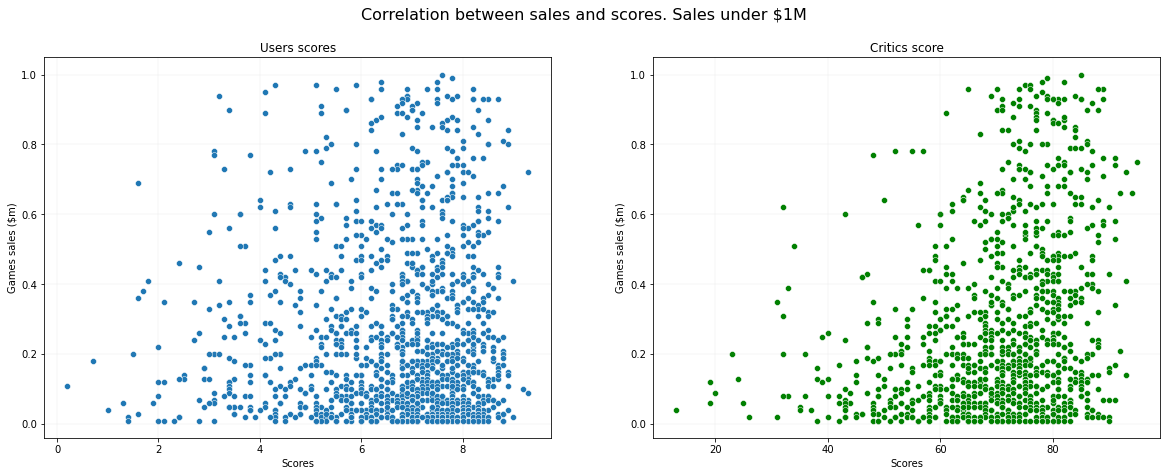

In [40]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('total_sales < 1'), ax=ax1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('total_sales < 1'), ax=ax2, color='green')

fig.suptitle('Correlation between sales and scores. Sales under $1M', fontsize=16)

ax1.set_xlabel('Scores')
ax1.set_ylabel('Games sales ($m)')
ax1.grid(linewidth=0.1)
ax1.set_title('Users scores')

ax2.set_xlabel('Scores')
ax2.set_ylabel('Games sales ($m)')
ax2.grid(linewidth=0.1)
ax2.set_title('Critics score')
plt.show()

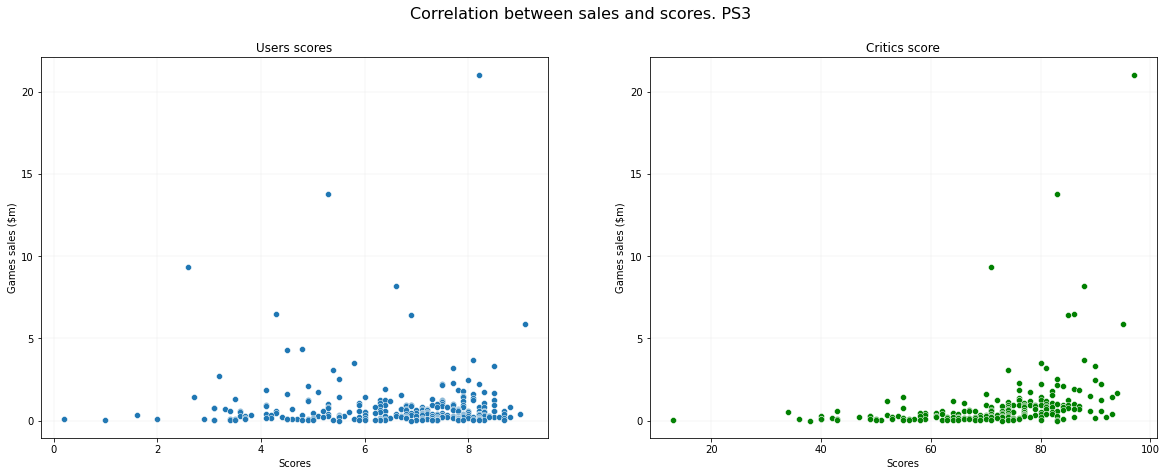

In [41]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform == "PS3"'), ax=ax1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform == "PS3"'), ax=ax2, color='green')

fig.suptitle('Correlation between sales and scores. PS3', fontsize=16)

ax1.set_xlabel('Scores')
ax1.set_ylabel('Games sales ($m)')
ax1.grid(linewidth=0.1)
ax1.set_title('Users scores')

ax2.set_xlabel('Scores')
ax2.set_ylabel('Games sales ($m)')
ax2.grid(linewidth=0.1)
ax2.set_title('Critics score')
plt.show()

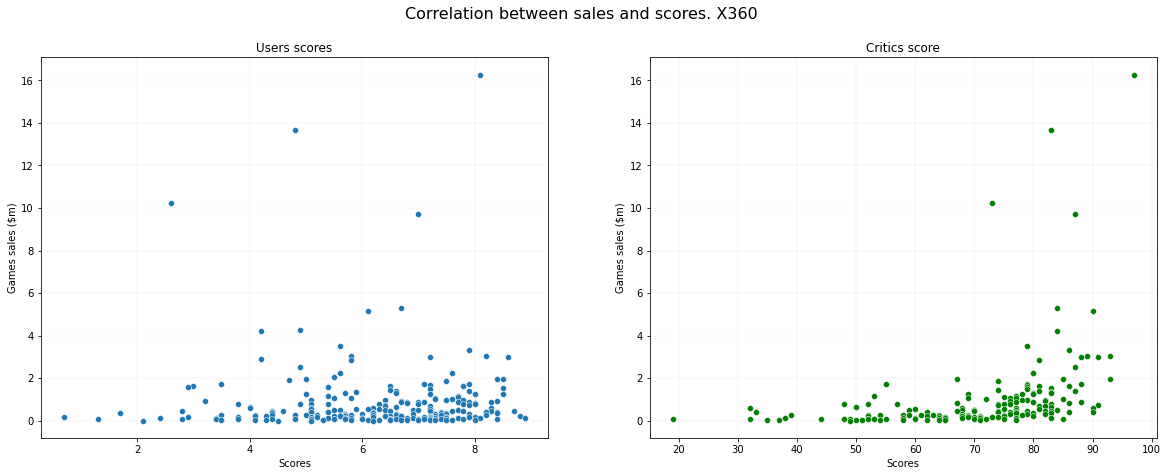

In [42]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform == "X360"'), ax=ax1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform == "X360"'), ax=ax2, color='green')

fig.suptitle('Correlation between sales and scores. X360', fontsize=16)

ax1.set_xlabel('Scores')
ax1.set_ylabel('Games sales ($m)')
ax1.grid(linewidth=0.1)
ax1.set_title('Users scores')

ax2.set_xlabel('Scores')
ax2.set_ylabel('Games sales ($m)')
ax2.grid(linewidth=0.1)
ax2.set_title('Critics score')
plt.show()

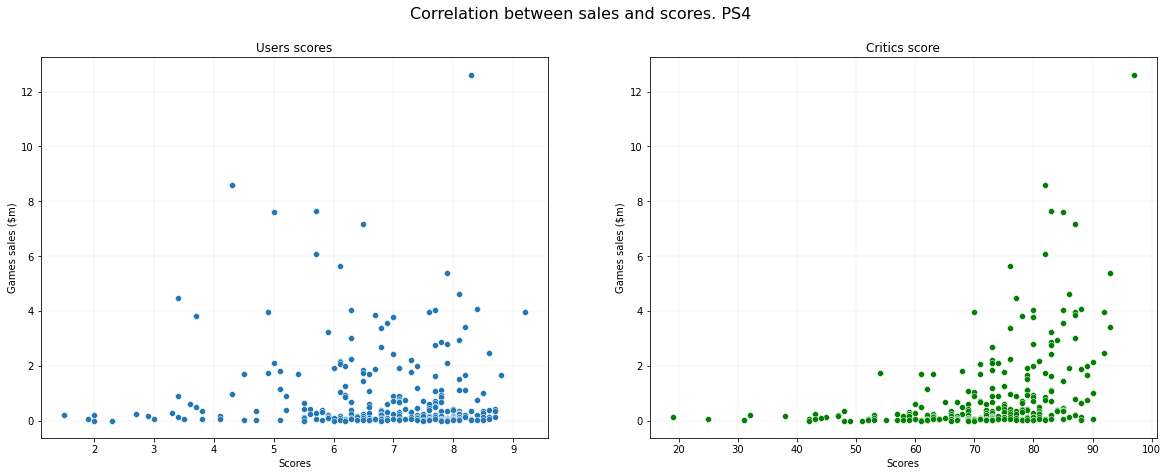

In [43]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform == "PS4"'), ax=ax1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform == "PS4"'), ax=ax2, color='green')

fig.suptitle('Correlation between sales and scores. PS4', fontsize=16)

ax1.set_xlabel('Scores')
ax1.set_ylabel('Games sales ($m)')
ax1.grid(linewidth=0.1)
ax1.set_title('Users scores')

ax2.set_xlabel('Scores')
ax2.set_ylabel('Games sales ($m)')
ax2.grid(linewidth=0.1)
ax2.set_title('Critics score')
plt.show()

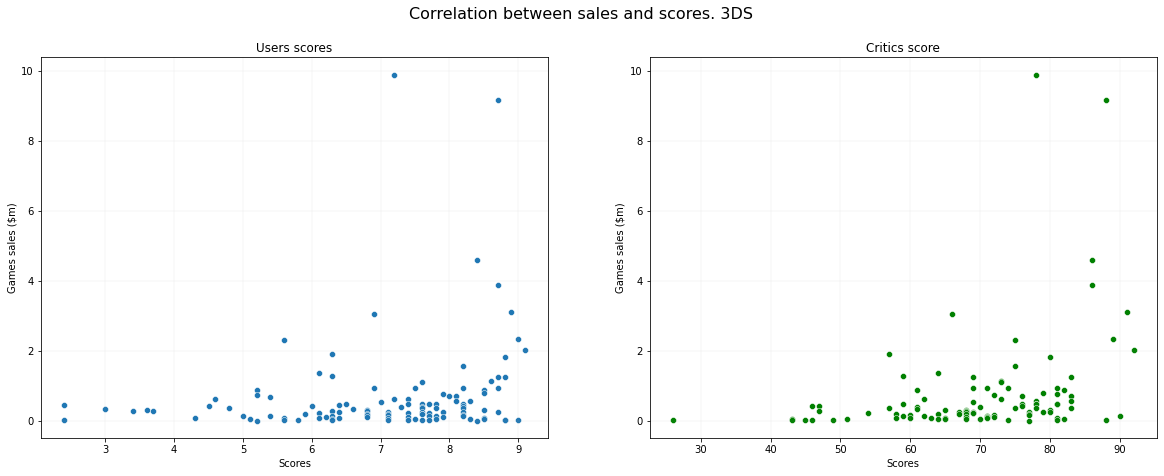

In [44]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform == "3DS"'), ax=ax1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform == "3DS"'), ax=ax2, color='green')

fig.suptitle('Correlation between sales and scores. 3DS', fontsize=16)

ax1.set_xlabel('Scores')
ax1.set_ylabel('Games sales ($m)')
ax1.grid(linewidth=0.1)
ax1.set_title('Users scores')

ax2.set_xlabel('Scores')
ax2.set_ylabel('Games sales ($m)')
ax2.grid(linewidth=0.1)
ax2.set_title('Critics score')
plt.show()

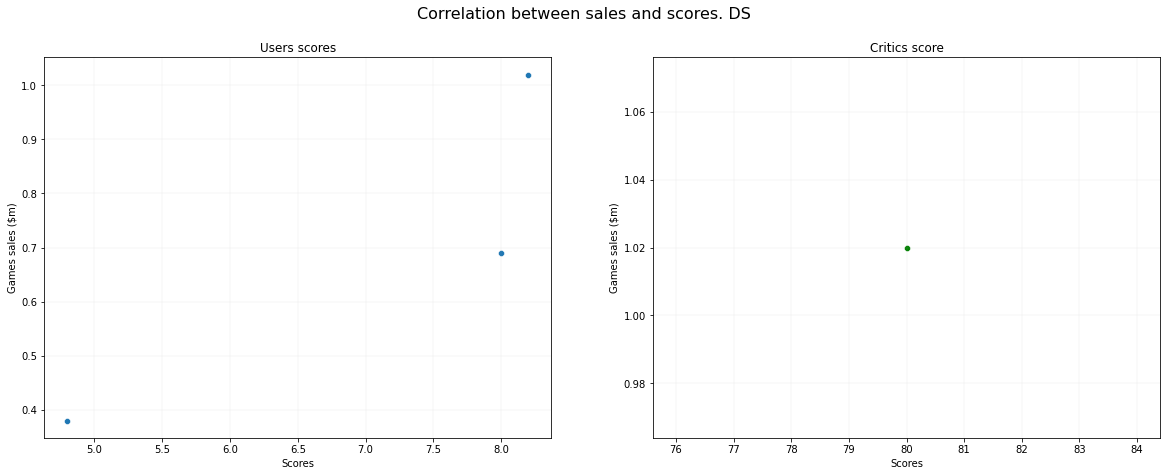

In [74]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sns.scatterplot(x='user_score', y='total_sales', data=actual_data.query('platform == "DS"'), ax=ax1)
sns.scatterplot(x='critic_score', y='total_sales', data=actual_data.query('platform == "DS"'), ax=ax2, color='green')

fig.suptitle('Correlation between sales and scores. DS', fontsize=16)

ax1.set_xlabel('Scores')
ax1.set_ylabel('Games sales ($m)')
ax1.grid(linewidth=0.1)
ax1.set_title('Users scores')

ax2.set_xlabel('Scores')
ax2.set_ylabel('Games sales ($m)')
ax2.grid(linewidth=0.1)
ax2.set_title('Critics score')
plt.show()

### Conclusions 

When calculating correlation scatterplots by rating, we found that it is possible to establish this relationship only for games released in North America. Data for Japan is not up-to-date and should not be used to decide on the promotion of games in this region. DS and 3DS games are popular platforms in Japan, so there is no rating for their games. In North America, you can focus on the assessments of critics and users for the X360 platform in the current period.


### Bestsellers distribution by genres

In [46]:
data['genre'].unique() 

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [47]:
sports = actual_data.query('genre == "Sports"')
racing = actual_data.query('genre == "Racing"')
platform = actual_data.query('genre == "Platform"')
misc = actual_data.query('genre == "Misc"')
action = actual_data.query('genre == "Action"')
puzzle = actual_data.query('genre == "Puzzle"')
shooter = actual_data.query('genre == "Shooter"')
fighting = actual_data.query('genre == "Fighting"')
simulation = actual_data.query('genre == "Simulation"')
role = actual_data.query('genre == "Role-Playing"')
adventure = actual_data.query('genre == "Adventure"')
strategy = actual_data.query('genre == "Strategy"')

### Bestsellers distribution by genres and platforms

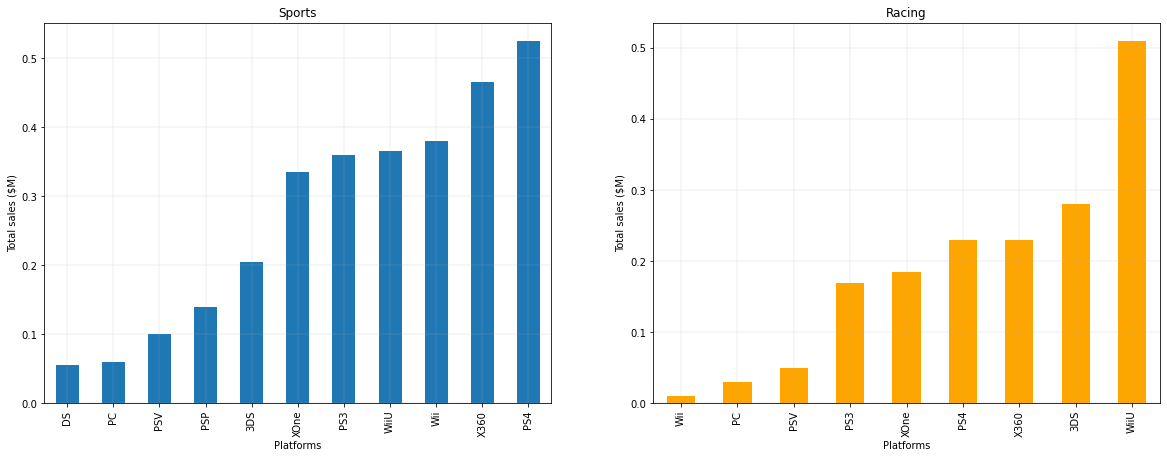

In [75]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 7)
)

sports.groupby('platform')['total_sales'].median().sort_values().plot.bar(ax=ax1)
racing.groupby('platform')['total_sales'].median().sort_values().plot.bar(ax=ax2, color='orange')


ax1.set_xlabel('Platforms')
ax1.set_ylabel('Total sales ($M)')
ax1.grid(linewidth=0.2)
ax1.set_title('Sports')

ax2.set_xlabel('Platforms')
ax2.set_ylabel('Total sales ($M)')
ax2.grid(linewidth=0.2)
ax2.set_title('Racing')

plt.show()

As mentioned earlier, we decided to calculate the median distribution by sales for this research. Here you can see that for the Sports genre, the highest median values for PS4 (0.5 million), for Racing - WiiU - 0.5 million

The breakdown by platform and genre helps give you a first impression of what genres and platforms are popular in countries. As we found out earlier, all Nintendo platforms are popular in Japan. We will deal with a more detailed analysis of regionalization later.

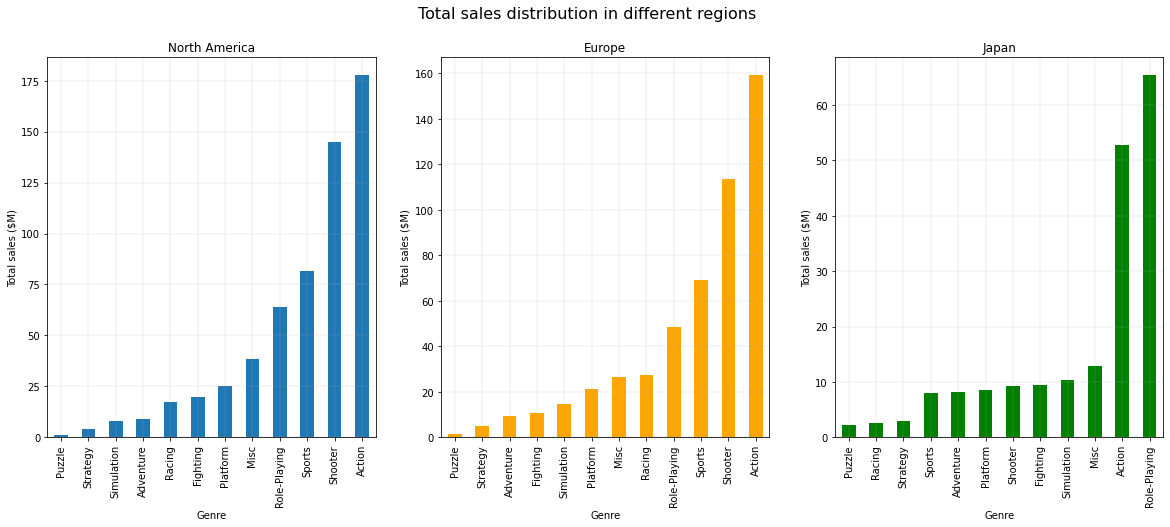

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 7)
)

actual_data.groupby('genre')['na_sales'].sum().sort_values().plot.bar(ax=ax1)
actual_data.groupby('genre')['eu_sales'].sum().sort_values().plot.bar(ax=ax2, color='orange')
actual_data.groupby('genre')['jp_sales'].sum().sort_values().plot.bar(ax=ax3, color='green')

fig.suptitle('Total sales distribution in different regions', fontsize=16)

ax1.set_xlabel('Genre')
ax1.set_ylabel('Total sales ($M)')
ax1.grid(linewidth=0.2)
ax1.set_title('North America')

ax2.set_xlabel('Genre')
ax2.set_ylabel('Total sales ($M)')
ax2.grid(linewidth=0.2)
ax2.set_title('Europe')

ax3.set_xlabel('Genre')
ax3.set_ylabel('Total sales ($M)')
ax3.grid(linewidth=0.2)
ax3.set_title('Japan')

plt.show()

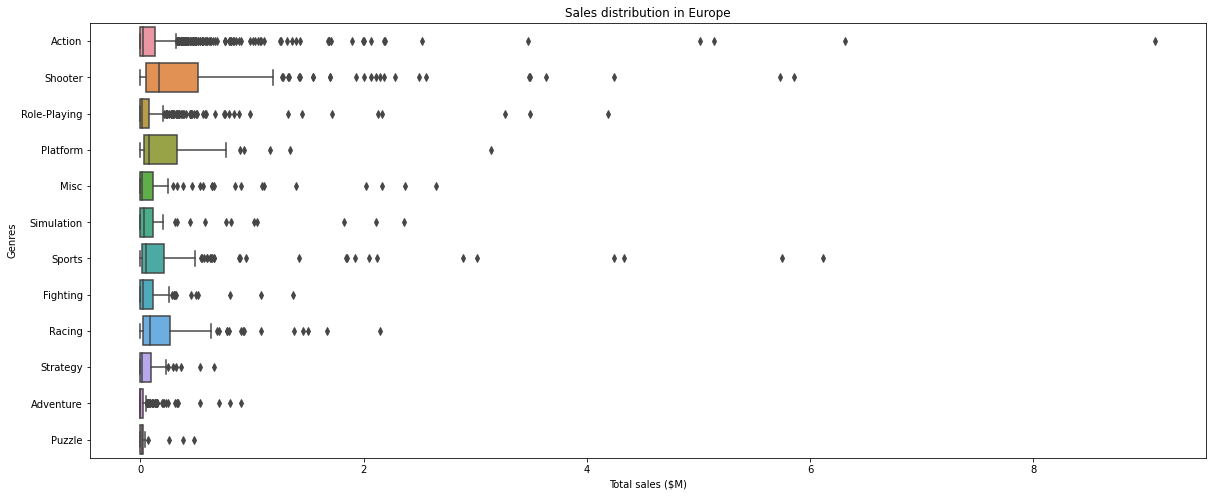

In [77]:

actual_data, y = actual_data, 'genre'
plt.figure(figsize=(20, 8))
(sns.boxplot(data = actual_data, y = y, x='eu_sales')
    .set(title = 'Sales distribution in Europe', xlabel = 'Total sales ($M)', ylabel = 'Genres'))

plt.show()


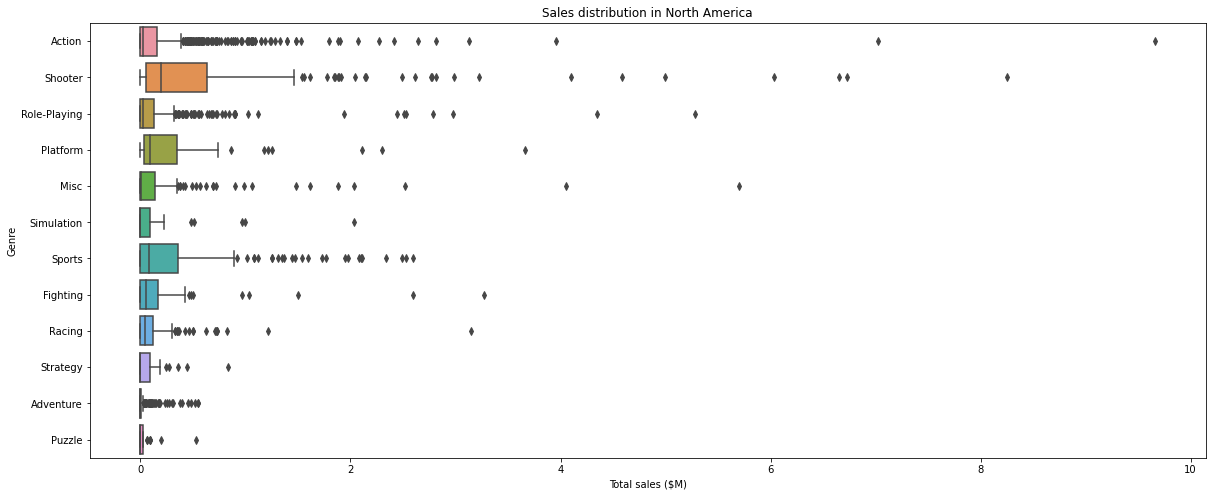

In [78]:
plt.figure(figsize=(20, 8))
(sns.boxplot(data = actual_data, y = y, x='na_sales')
    .set(title = 'Sales distribution in North America',xlabel = 'Total sales ($M)', ylabel = 'Genre'))

plt.show()

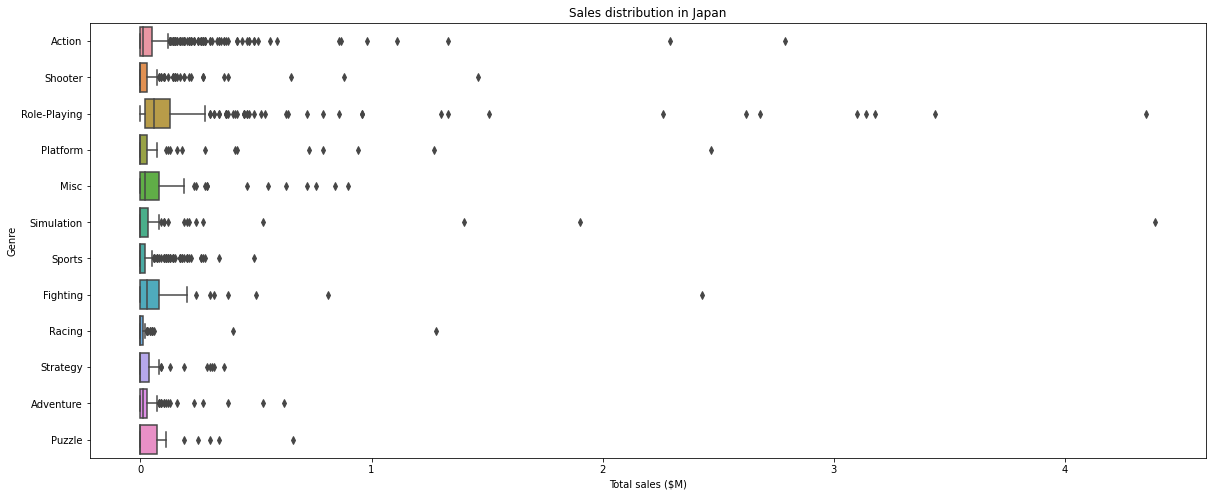

In [79]:
plt.figure(figsize=(20, 8))
(sns.boxplot(data = actual_data, y = y, x='jp_sales')
    .set(title = 'Sales distribution in Japan', xlabel = 'Total sales ($M)', ylabel = 'Genre'))

plt.show()

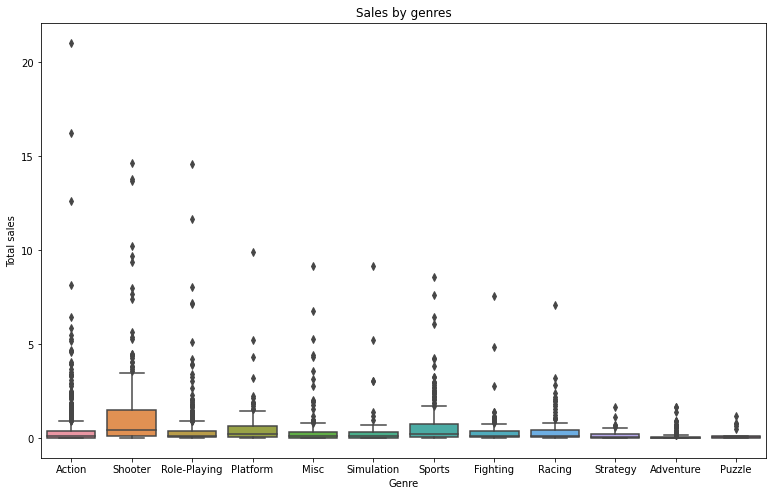

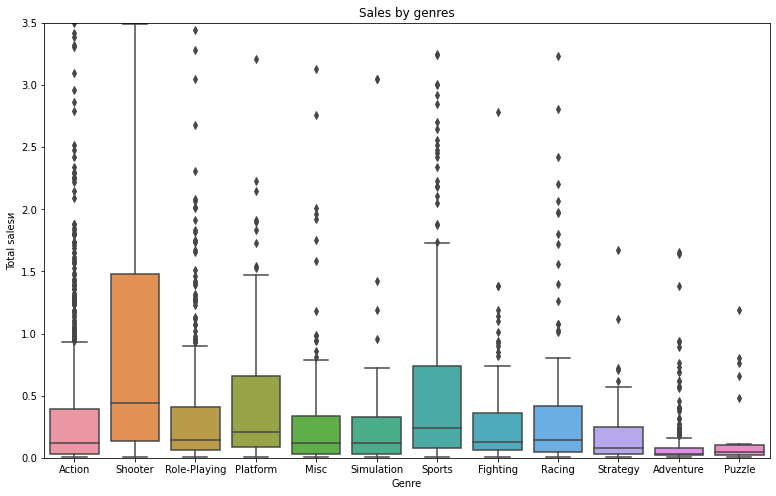

In [80]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = actual_data.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Sales by genres', xlabel = 'Genre', ylabel = 'Total sales'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Sales by genres', xlabel = 'Genre', ylabel = 'Total salesи', ylim=(0, 3.5)))
plt.show()

## Conclusions

1. We studied how many games were released in different years and plotted the distribution of their release over the years. The peak activity of the release of games fell in the tenth year of the XXI century. The data looks realistic: it was in 2000-2010 that new video game platforms appeared and the game production industry developed. The platform's life cycle needs to be longer: gaming giants like PS, Xbox and Nintendo produce different models, hence new games. Some platforms become obsolete, and others come to replace them. For example, WiiU and GC become less relevant for players after 2012.

##### Data for the current period has changed the general idea of popular platforms. Currently, the most popular are PS3, X360, PS4, and 3DS. That is the newest and most relevant platform.
    
    
2. According to the schedule, the platform's life cycle and viability (success) are between 4-6 years.
    
    
3. For market analysis and trend prediction for 2017, I would take two relevant periods, depending on what Business Development requires.
The first period is from 2007 to the present time of the study. It is necessary to track the life cycle of sales and the platform's success. Fashion is cyclical, so trends come back with a division into periods of 10-20 years. However, I would take the period from 2012 to the present for forecasting sales and planning for purchases. As we pointed out earlier, the life cycle of platforms is relatively short.
    
    
    
4. Top sellers for the entire period - PS2, DS, PS3, Wii and X360. However, a sharp rise follows a sharp fall.
    
    
    
5. When building a "box of minds", we formed a general idea of ​​sales among the top platforms. Each platform has outliers - games that generated the principal turnover for the year and provided revenue. The median value is a more accurate representation of the sales and success of the games. Therefore, we chose the median value, not the sum, for analyzing popular genres. We will talk about this in the following paragraphs.
    
    
6. Next, we studied the correlation between sales and user and critic ratings. Games with low ratings have low sales. The distribution of critics' and users' ratings is almost identical. This fact supports the conclusion that critics' ratings influence user ratings. Accordingly, the higher the ratings of users and critics, the higher the sales. However, this correlation only applies to games released in North America. They have more ratings than, for example, in Japan.
    


For North America and Europe, the TOP 4 popular genres are identical:

1) action
2) Shooter
3) Sports
4) Roleplaying

The Misc genre occupies 5th place in North America and Racing in Europe. In Japan, the TOP-5 genres are different:

1) Roleplaying
2) action
3)Misc
4) Simulation
5) Fighting

Moreover, the Role-Playing and Action genres unconditionally dominate (65 and 55 million, respectively, against 10 million for other genres). The specifics of Japanese culture can explain this difference between Japan, North America, and Europe.





## The User portrait analysis

### Tasks

- [x]  To define the top five platforms in the selected regions
- [x]  To obtain the most popular genres in the regions 
- [x]  To recognize the influence of ESRB on sales by regions

### Popular platforms by regions 

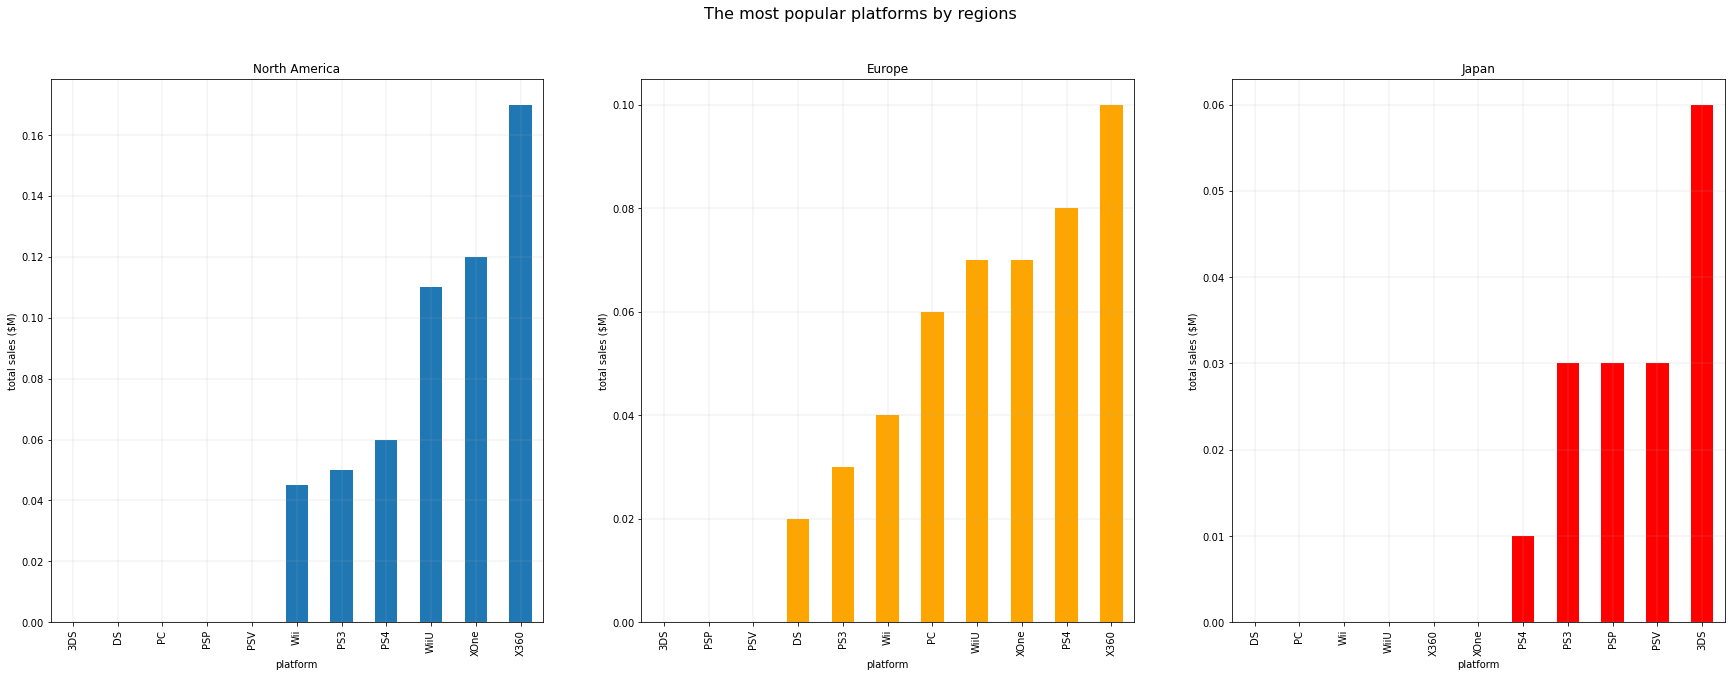

In [81]:

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(30, 10)
)

actual_data.groupby('platform')['na_sales'].median().sort_values().plot.bar(ax=ax1)
actual_data.groupby('platform')['eu_sales'].median().sort_values().plot.bar(ax=ax2, color='orange')
actual_data.groupby('platform')['jp_sales'].median().sort_values().plot.bar(ax=ax3, color='red')

fig.suptitle('The most popular platforms by regions', fontsize=16)

ax1.set_xlabel('platform')
ax1.set_ylabel('total sales ($M)')
ax1.grid(linewidth=0.2)
ax1.set_title('North America')

ax2.set_xlabel('platform')
ax2.set_ylabel('total sales ($M)')
ax2.grid(linewidth=0.2)
ax2.set_title('Europe')

ax3.set_xlabel('platform')
ax3.set_ylabel('total sales ($M)')
ax3.grid(linewidth=0.2)
ax3.set_title('Japan')

plt.show()

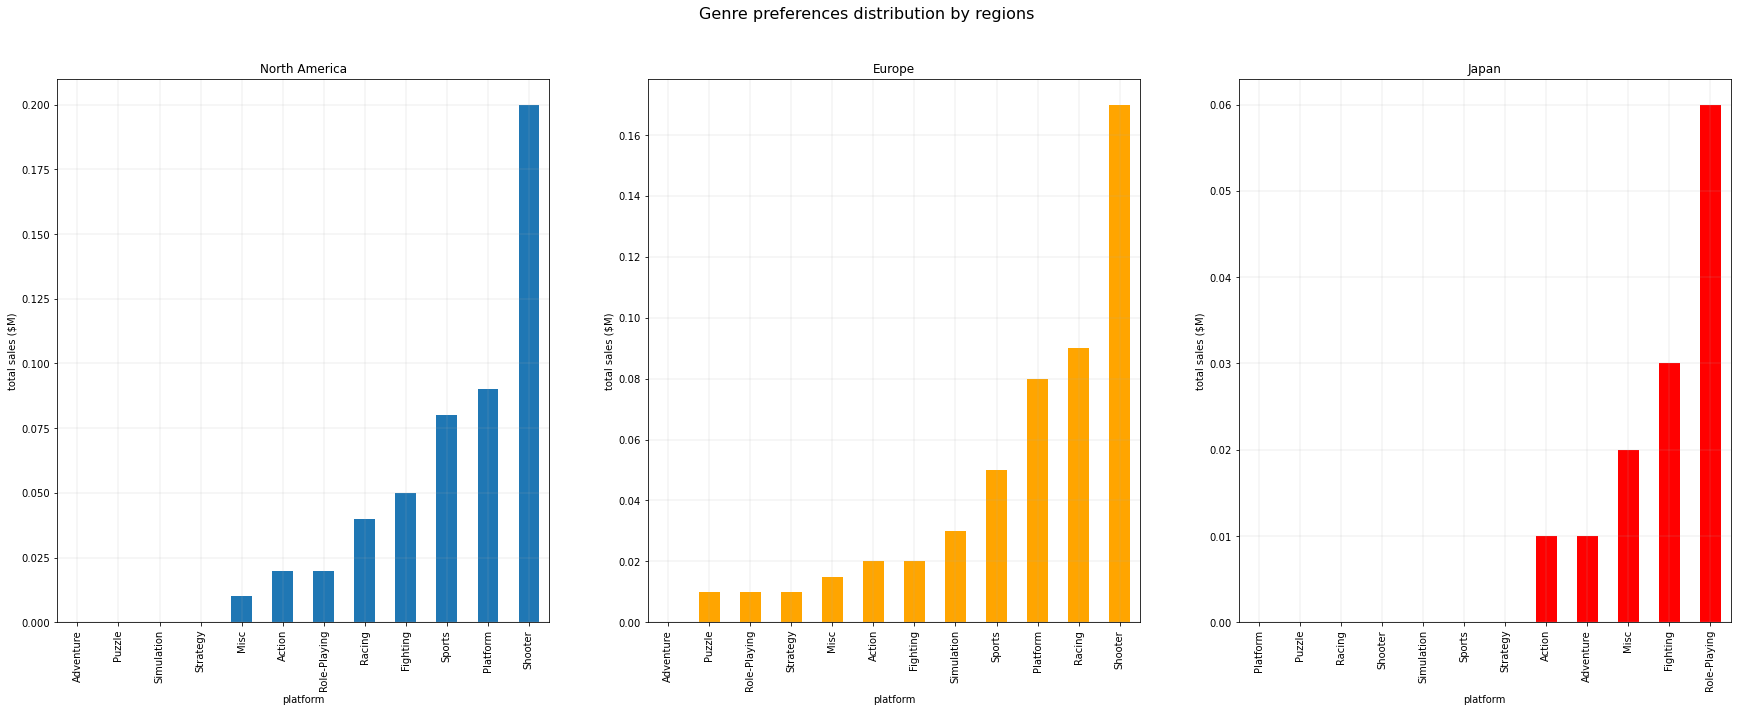

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(30, 10)
)

actual_data.groupby('genre')['na_sales'].median().sort_values().plot.bar(ax=ax1)
actual_data.groupby('genre')['eu_sales'].median().sort_values().plot.bar(ax=ax2, color='orange')
actual_data.groupby('genre')['jp_sales'].median().sort_values().plot.bar(ax=ax3, color='red')

fig.suptitle('Genre preferences distribution by regions', fontsize=16)

ax1.set_xlabel('platform')
ax1.set_ylabel('total sales ($M)')
ax1.grid(linewidth=0.2)
ax1.set_title('North America')

ax2.set_xlabel('platform')
ax2.set_ylabel('total sales ($M)')
ax2.grid(linewidth=0.2)
ax2.set_title('Europe')

ax3.set_xlabel('platform')
ax3.set_ylabel('total sales ($M)')
ax3.grid(linewidth=0.2)
ax3.set_title('Japan')

plt.show()

In [56]:

actual_data['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

In [83]:
actual_data.loc[data['rating'] == 'K-A', 'rating'] = 'E' # replace K-A on E, because it the same, but the first one obsoleted

actual_data['rating'].value_counts()

M       498
T       412
E       395
E10+    306
Name: rating, dtype: int64

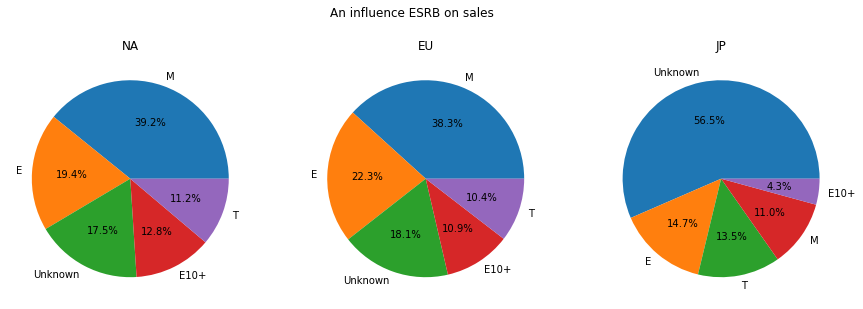

In [86]:

temp = actual_data.copy()
temp.rating = temp.rating.fillna('Unknown')

games_fresh = temp.copy()
countries = games_fresh.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('An influence ESRB on sales')
for i in range(3):
  
  df_i = (games_fresh.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True))

  axs[i].pie(df_i[countries[i]], labels = df_i['rating'], autopct='%1.1f%%')
  
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

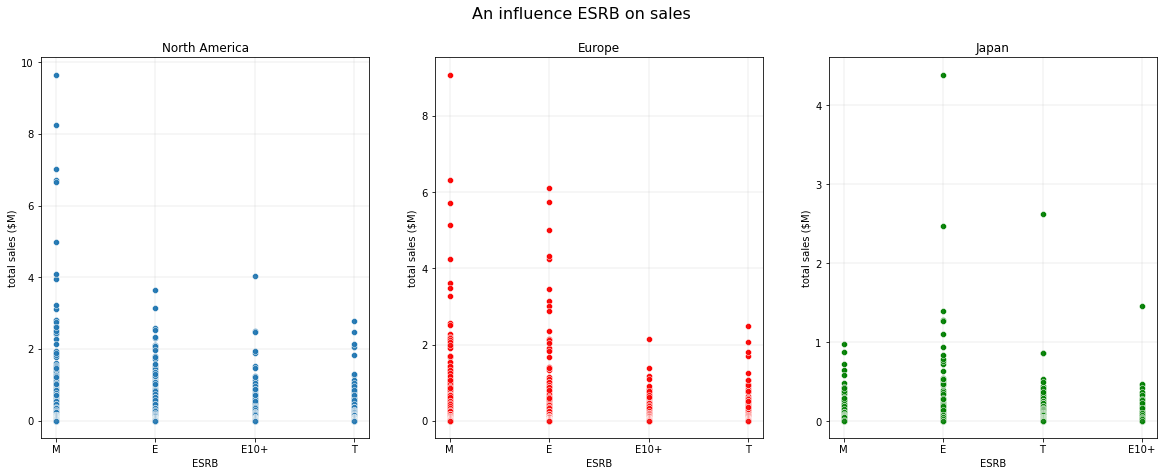

In [85]:
#check distribution

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(20, 7)
)

sns.scatterplot(x="rating", y="na_sales", data=actual_data.query('na_sales > 0'), ax=ax1)
sns.scatterplot(x="rating", y="eu_sales", data=actual_data.query('eu_sales > 0'), ax=ax2, color='red')
sns.scatterplot(x="rating", y="jp_sales", data=actual_data.query('jp_sales > 0'), ax=ax3, color='green')

fig.suptitle('An influence ESRB on sales', fontsize=16)

ax1.set_xlabel('ESRB')
ax1.set_ylabel('total sales ($M)')
ax1.grid(linewidth=0.2)
ax1.set_title('North America')

ax2.set_xlabel('ESRB')
ax2.set_ylabel('total sales ($M)')
ax2.grid(linewidth=0.2)
ax2.set_title('Europe')

ax3.set_xlabel('ESRB')
ax3.set_ylabel('total sales ($M)')
ax3.grid(linewidth=0.2)
ax3.set_title('Japan')
plt.show()

## Conclusions

##### Portrait of a user from North America (we generalize and take the highest indicators):

The most popular gaming platforms (in descending order) are X360, PS2, Wii, PS3, and DS.
    
Genre preferences: Shooter, Platform, Sports, fighting
    
The most popular rating is M (adult).

##### Portrait of a user from Europe (we generalize and take the highest figures):

The most popular gaming platforms (in descending order) are PS2, PS3, X360, Wii, and PS4.
    
Genre preferences: Shooter, Racing, Platform
    
The most popular rating is M (for adults) and E (games for everyone).

##### Portrait of a user from Japan (we generalize and take the highest figures):

Most popular gaming platforms (desc) - DS, PS, PS2, SNES, 3DS
    
Genre preferences: Role-Playing, Fighting, Misc
    
Will choose an E rating (games for everyone) or T (for teenagers). Most likely, popular games in Japan were left without a rating. 

## Hypothesis testing

### Tasks

- [x] Check: Average user ratings of Xbox One and PC platforms are the same
- [x] Check: Average user ratings for Action and Sports genres are different.
- [x] Set alpha
- [x] Define criteria for testing hypotheses


In [64]:
data['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

###  H0: The average user ratings of the Xbox One and PC platforms are the same

### H1: The average user ratings of the Xbox One and PC platforms are different

In [87]:
x_pc = actual_data.dropna(subset=['user_score']).query('platform == "XOne" or platform == "PC"') 
x_pc = x_pc[x_pc['name'].isin(x_pc[x_pc['name'].duplicated()]['name'].unique())].copy() 
x_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


In [88]:
# Conducting a t-test for games that are on two platforms
# the variance of populations is assumed to be different, because H1 suggests that there should be different estimates
# alpha = .05  
x = x_pc.query('platform == "XOne"')['user_score']
y = x_pc.query('platform == "PC"')['user_score']
results = st.ttest_ind(x,y, equal_var=False)

alpha = .05

print(results.pvalue) 
if (results.pvalue < alpha):
    print("Reject H_0")
else:
    print("Failed to reject the H_0")

0.018267845410565663
Reject H_0


In [67]:
x_pc.query('platform == "XOne"')['user_score'].mean() 

6.706329113924054

In [68]:
x_pc.query('platform == "PC"')['user_score'].mean()

6.136708860759495

### H0: Average user ratings for Action genres are the same

### H1: Average user ratings for Action genres are different

In [69]:
action_sports = actual_data.dropna(subset=['user_score']).query('genre == "Action" or genre == "Sports"') #делаем выборку из данных только те строки, которые содержат XOne PC
action_sports = action_sports[action_sports['name'].isin(action_sports[action_sports['name'].duplicated()]['name'].unique())].copy()
x_pc.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86.0,6.4,M,2.95
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
680,NBA 2K16,XOne,2015,Sports,1.95,0.15,0.00,0.24,86.0,6.2,E10+,2.34
709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25


In [89]:
 x = action_sports.query('genre == "Sports"')['user_score']
y = action_sports.query('genre == "Action"')['user_score']
results = st.ttest_ind(x,y, equal_var=False)

alpha = .05

print(results.pvalue) # вывод значения p-value на экран 
if (results.pvalue < alpha):
    print("Reject H_0")
else:
    print("Failed to reject the H_0")

3.421049811616316e-17
Reject H_0


In [71]:
#проверка
action_sports.query('genre == "Sports"')['user_score'].mean()


5.416

In [72]:
#проверка
action_sports.query('genre == "Action"')['user_score'].mean()

6.750241545893728

## Шаг 6. Conclusions and business recommendations 

#### All assigned tasks were completed. Intermediate conclusions can be found after each completed block.

##### Summary:

- gaps in the data - the human factor or the characteristics of the region;

- users scores correlate with critic ones: the higher the critic rating, the higher the user rating. However, this corresponds rather to one region – North America;

- peak production of games - 2000-2010;

- the most successful platforms in terms of sales: PS2, DS, PS3, Wii and X360.

- the popularity of the platform decreases after 4-6 years after its successful existence. The most popular platform in recent years (2012-2014) is PS3.

- current period for predictions and analysis – 2012-2016.

- Portrait of a user from North America (we generalize and take the highest indicators):

The most popular gaming platforms (in descending order) are X360, PS2, Wii, PS3, and DS.

Genre preferences: Shooter, Platform, Sports, fighting

The most popular rating is M (adult).

-  Portrait of a user from Europe (we generalize and take the highest indicators):

The most popular gaming platforms (in descending order) are PS2, PS3, X360, Wii, and PS4.

Genre preferences: Shooter, Racing, Platform

The most popular rating is M| (games for everyone).

- Portrait of a user from Japan (we generalize and take the highest indicators):

Most popular gaming platforms (desc) - DS, PS, PS2, SNES, 3DS

Genre preferences: Role-Playing, Fighting, Misc

Will choose an E rating (games for everyone) or T (for teenagers). There are a lot of 0 values in the scatterplot. Most likely, popular games in Japan were left without a rating.

- The best-selling genres are Role-Playing, Shooter, and Platform for the current period.


- Rejecting the null hypothesis: XOne and PC user ratings are different.

- We reject the null hypothesis: the average user ratings are different.

-  To test both hypotheses, we use a significance level of 5% because we are testing two-tailed hypotheses.

##### Recommendations for business:

- Segment the market by region and conduct an advertising campaign, taking into account the fact that in the different areas, some genres and platforms are more popular than others;

- A more profitable strategy would be to promote M-rated games in North America - its distribution in terms of ratings in all countries stands out from the rest of the categories;